## Try segmenting with a thresholding + Watershed based pipeline

In this case the watershed does not seem to be successful

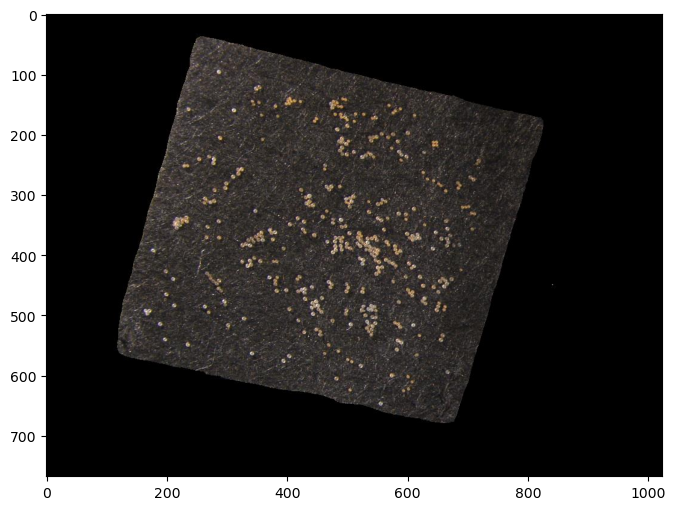

In [6]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d, imshow_multi2d
import os
from skimage.filters import gaussian
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu
from tnia.segmentation.separate import separate_touching, separate_touching2
from skimage.morphology import remove_small_objects
import numpy as np
from skimage.measure import label
# import random lable colormap
from tnia.plotting.plt_helper import random_label_cmap

tnia_images_path = r"D:\images\tnia-python-images"

im = imread(os.path.join(tnia_images_path, r"imagesc\2024_01_10_insect_egg_count\I1_F1_O20_SWI_R1_13-09-23.tif"))
            
fig = imshow2d(im)


## Convert to Hue Saturation and Brightness and look at histograms

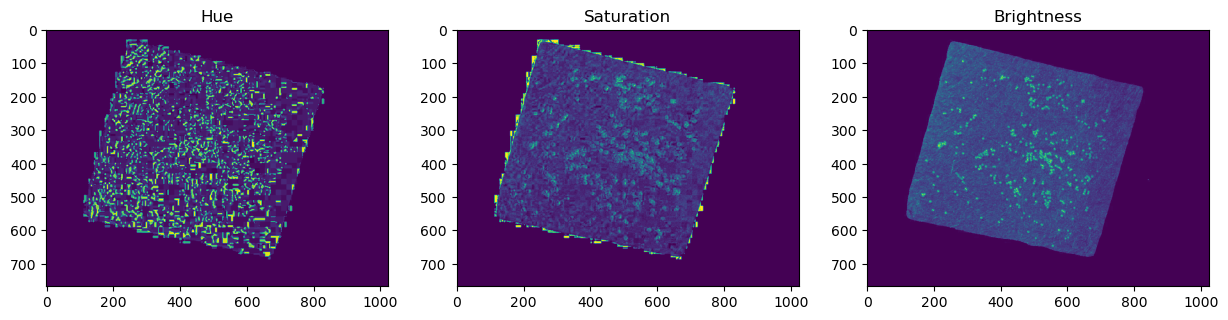

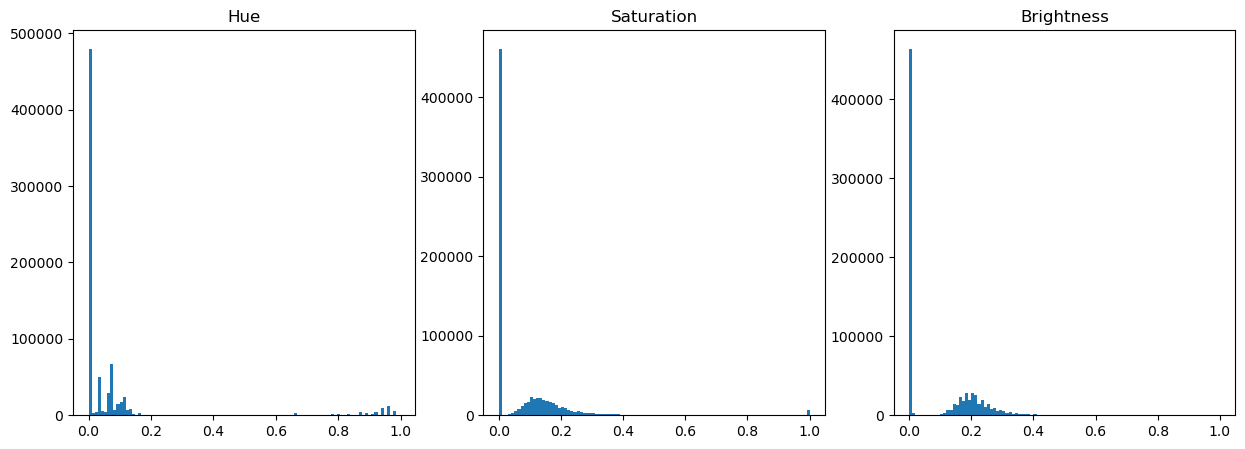

In [7]:
# convert to HSB
im_hsv = rgb2hsv(im)

fig = imshow_multi2d([im_hsv[:,:,0], im_hsv[:,:,1], im_hsv[:,:,2]], ['Hue', 'Saturation', 'Brightness'], 1, 3, width=15)

# we can get the histogram of each channel using the hist keyword
fig = imshow_multi2d([im_hsv[:,:,0], im_hsv[:,:,1], im_hsv[:,:,2]], ['Hue', 'Saturation', 'Brightness'], 1, 3, width=15, height=5, plottypes=3*['hist'])

## Try a couple of different watershed approaches

In this block I call a couple of different helpers I have to wrap Watershed workflows.  Neither seems successful. 

(1752, 2)


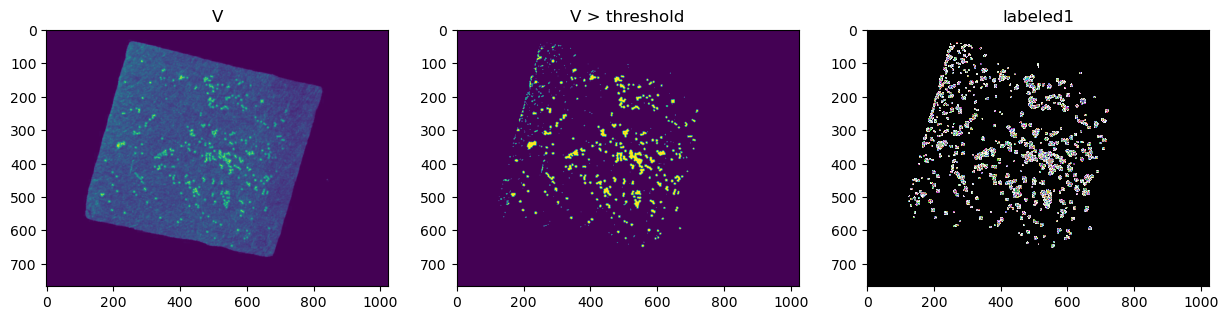

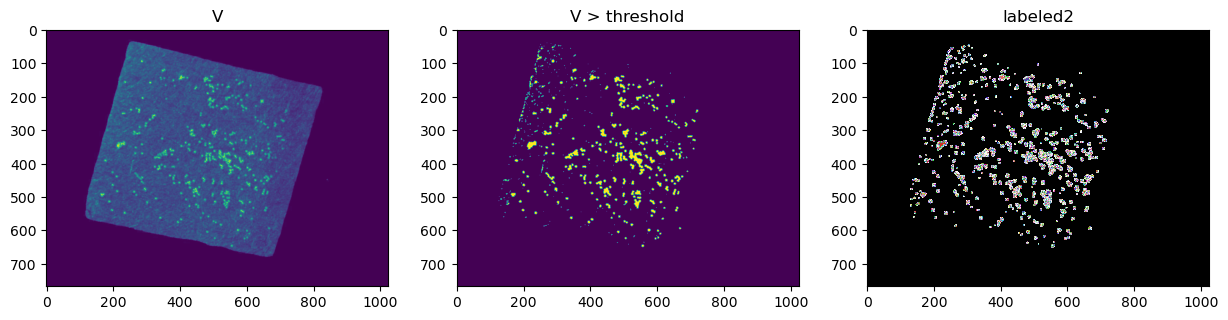

In [45]:
min_distance = 3 

# apply guassian blur to hue
im_v_blur = gaussian(im_hsv[:,:,2], sigma=1)

# apply otsu threshold 
thresholded = im_v_blur>threshold_otsu(im_v_blur[im_v_blur>0])

# watershed to separate then label
intensity_to_use = im_hsv[:,:,2]*thresholded

# try to separate touching objects
separated1, _, _ = separate_touching(thresholded, 3, 0)
separated2, distance = separate_touching2(im_hsv[:,:,2], thresholded, 3, 2, 2)

labeled1 = label(separated1, connectivity=1)
labeled2 = label(separated2, connectivity=1)

fig = imshow_multi2d([im_v_blur, thresholded, labeled1], ['V', 'V > threshold','labeled1'], 1, 3, width=15, colormaps=[None, None, random_label_cmap()])
fig = imshow_multi2d([im_v_blur, thresholded, labeled2], ['V', 'V > threshold','labeled2'], 1, 3, width=15, colormaps=[None, None, random_label_cmap()])

## Inspect in Napari

In [33]:
import napari
viewer = napari.Viewer()
viewer.add_image(im_v_blur)
viewer.add_image(thresholded)
viewer.add_labels(labeled1)
viewer.add_labels(labeled2)


<Image layer 'separated2' at 0x268d5a243d0>